In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sf-crime/train.csv.zip
/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/test.csv.zip


In [2]:
t=pd.read_csv('/kaggle/input/sf-crime/train.csv.zip')
te=pd.read_csv('/kaggle/input/sf-crime/test.csv.zip')

In [3]:
t.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
te.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [5]:
x=t['Category'].value_counts()
x.shape

(39,)

In [6]:
t.shape

(878049, 9)

In [7]:
te.shape

(884262, 7)

In [8]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [9]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [10]:
t.drop(['Descript','Resolution','Address'],inplace=True,axis=1)
te.drop('Address',axis=1,inplace=True)

t['DayOfWeek'].replace(to_replace=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],value=[i for i in range(0,7)],inplace=True)
te['DayOfWeek'].replace(to_replace=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],value=[i for i in range(0,7)],inplace=True)




In [11]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
te['DayOfWeek']=l.fit_transform(te['DayOfWeek'])
te.head()

,Id,Dates,DayOfWeek,PdDistrict,X,Y
0,0,2015-05-10 23:59:00,6,BAYVIEW,-122.399588,37.735051
1,1,2015-05-10 23:51:00,6,BAYVIEW,-122.391523,37.732432
2,2,2015-05-10 23:50:00,6,NORTHERN,-122.426002,37.792212
3,3,2015-05-10 23:45:00,6,INGLESIDE,-122.437394,37.721412
4,4,2015-05-10 23:45:00,6,INGLESIDE,-122.437394,37.721412


In [12]:
t.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,WARRANTS,2,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,2,PARK,-122.438738,37.771541


In [13]:
te.head()

,Id,Dates,DayOfWeek,PdDistrict,X,Y
0,0,2015-05-10 23:59:00,6,BAYVIEW,-122.399588,37.735051
1,1,2015-05-10 23:51:00,6,BAYVIEW,-122.391523,37.732432
2,2,2015-05-10 23:50:00,6,NORTHERN,-122.426002,37.792212
3,3,2015-05-10 23:45:00,6,INGLESIDE,-122.437394,37.721412
4,4,2015-05-10 23:45:00,6,INGLESIDE,-122.437394,37.721412


In [14]:
X=t.drop(['Category'],axis=1)
y=pd.get_dummies(t['Category'])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)



(790244, 5) (790244, 39)
(87805, 5) (87805, 39)


In [15]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
te['DayOfWeek']=l.fit_transform(te['DayOfWeek'])
te.head()

,Id,Dates,DayOfWeek,PdDistrict,X,Y
0,0,2015-05-10 23:59:00,6,BAYVIEW,-122.399588,37.735051
1,1,2015-05-10 23:51:00,6,BAYVIEW,-122.391523,37.732432
2,2,2015-05-10 23:50:00,6,NORTHERN,-122.426002,37.792212
3,3,2015-05-10 23:45:00,6,INGLESIDE,-122.437394,37.721412
4,4,2015-05-10 23:45:00,6,INGLESIDE,-122.437394,37.721412


In [16]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   DayOfWeek   878049 non-null  int64  
 3   PdDistrict  878049 non-null  object 
 4   X           878049 non-null  float64
 5   Y           878049 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 40.2+ MB


In [17]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  int64  
 3   PdDistrict  884262 non-null  object 
 4   X           884262 non-null  float64
 5   Y           884262 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 40.5+ MB


In [18]:
t['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [19]:
type(t['Dates'])

pandas.core.series.Series

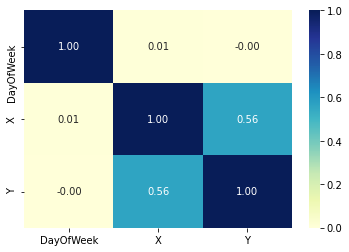

In [20]:
_ = sns.heatmap(t.corr(), annot = True, fmt = ".2f", cmap = 'YlGnBu')

array([[<AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

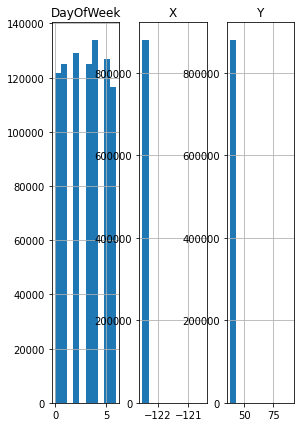

In [21]:
t.hist(column=t.columns, figsize=(20,7),layout=(1,13))

In [22]:
ls1=list(t['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:4:]
t['Year']=ls1 

ls1=list(t['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][5:7:]
t['Month']=ls1 

ls1=list(t['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][8:10:]
t['Day']=ls1 

ls1=list(t['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-6:]
t['Hours']=ls1

ls1=list(t['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][-5:-3:]
t['Minutes']=ls1

t.drop('Dates',axis=1,inplace=True)
t=pd.concat([t,pd.get_dummies(t['PdDistrict'])],axis=1)
t.drop('PdDistrict',axis=1,inplace=True)
t.head()

,Category,DayOfWeek,X,Y,Year,Month,Day,Hours,Minutes,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,WARRANTS,2,-122.425892,37.774599,2015,05,13,23,53,0,0,0,0,1,0,0,0,0,0
1,OTHER OFFENSES,2,-122.425892,37.774599,2015,05,13,23,53,0,0,0,0,1,0,0,0,0,0
2,OTHER OFFENSES,2,-122.424363,37.800414,2015,05,13,23,33,0,0,0,0,1,0,0,0,0,0
3,LARCENY/THEFT,2,-122.426995,37.800873,2015,05,13,23,30,0,0,0,0,1,0,0,0,0,0
4,LARCENY/THEFT,2,-122.438738,37.771541,2015,05,13,23,30,0,0,0,0,0,1,0,0,0,0


In [23]:
ls1=list(te['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:4:]
te['Year']=ls1 

ls1=list(te['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][5:7:]
te['Month']=ls1 

ls1=list(te['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][8:10:]
te['Day']=ls1 

ls1=list(te['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-6:]
te['Hours']=ls1

ls1=list(te['Dates'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][-5:-3:]
te['Minutes']=ls1

te.drop('Dates',axis=1,inplace=True)
te=pd.concat([te,pd.get_dummies(te['PdDistrict'])],axis=1)
te.drop('PdDistrict',axis=1,inplace=True)
te.head()

,Id,DayOfWeek,X,Y,Year,Month,Day,Hours,Minutes,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0,6,-122.399588,37.735051,2015,05,10,23,59,1,0,0,0,0,0,0,0,0,0
1,1,6,-122.391523,37.732432,2015,05,10,23,51,1,0,0,0,0,0,0,0,0,0
2,2,6,-122.426002,37.792212,2015,05,10,23,50,0,0,0,0,1,0,0,0,0,0
3,3,6,-122.437394,37.721412,2015,05,10,23,45,0,0,1,0,0,0,0,0,0,0
4,4,6,-122.437394,37.721412,2015,05,10,23,45,0,0,1,0,0,0,0,0,0,0


In [24]:
X=t.drop(['Category'],axis=1)
X=X.astype(float)
y=pd.get_dummies(t['Category'])
y.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(790244, 18) (790244, 39)
(87805, 18) (87805, 39)


In [26]:
y.dtypes

ARSON                          uint8
ASSAULT                        uint8
BAD CHECKS                     uint8
BRIBERY                        uint8
BURGLARY                       uint8
DISORDERLY CONDUCT             uint8
DRIVING UNDER THE INFLUENCE    uint8
DRUG/NARCOTIC                  uint8
DRUNKENNESS                    uint8
EMBEZZLEMENT                   uint8
EXTORTION                      uint8
FAMILY OFFENSES                uint8
FORGERY/COUNTERFEITING         uint8
FRAUD                          uint8
GAMBLING                       uint8
KIDNAPPING                     uint8
LARCENY/THEFT                  uint8
LIQUOR LAWS                    uint8
LOITERING                      uint8
MISSING PERSON                 uint8
NON-CRIMINAL                   uint8
OTHER OFFENSES                 uint8
PORNOGRAPHY/OBSCENE MAT        uint8
PROSTITUTION                   uint8
RECOVERED VEHICLE              uint8
ROBBERY                        uint8
RUNAWAY                        uint8
S

In [27]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense,Activation

model=Sequential()
model.add(Dense(128,input_shape=(X.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(39,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2432      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 39)                2

In [28]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

train=model.fit(X_train,y_train, 
         batch_size=32,
         epochs=10,
         verbose=2,
         validation_data=(X_test,y_test))



Epoch 1/10
24696/24696 - 37s - loss: 2.6713 - accuracy: 0.2130 - val_loss: 2.6120 - val_accuracy: 0.2240
Epoch 2/10
24696/24696 - 37s - loss: 2.5929 - accuracy: 0.2288 - val_loss: 2.5771 - val_accuracy: 0.2296
Epoch 3/10
24696/24696 - 36s - loss: 2.5894 - accuracy: 0.2277 - val_loss: 2.5800 - val_accuracy: 0.2322
Epoch 4/10
24696/24696 - 37s - loss: 2.5687 - accuracy: 0.2333 - val_loss: 2.5627 - val_accuracy: 0.2359
Epoch 5/10
24696/24696 - 37s - loss: 2.5853 - accuracy: 0.2284 - val_loss: 2.5764 - val_accuracy: 0.2336
Epoch 6/10
24696/24696 - 36s - loss: 2.5757 - accuracy: 0.2316 - val_loss: 2.5669 - val_accuracy: 0.2336
Epoch 7/10
24696/24696 - 36s - loss: 2.5788 - accuracy: 0.2310 - val_loss: 2.5763 - val_accuracy: 0.2343
Epoch 8/10
24696/24696 - 37s - loss: 2.5690 - accuracy: 0.2353 - val_loss: 2.5602 - val_accuracy: 0.2366
Epoch 9/10
24696/24696 - 36s - loss: 2.5905 - accuracy: 0.2266 - val_loss: 2.7013 - val_accuracy: 0.2106
Epoch 10/10
24696/24696 - 37s - loss: 2.5878 - accuracy

In [29]:
test=te.drop(['Id'],axis=1)
test=test.astype(float)
test.dtypes

DayOfWeek     float64
X             float64
Y             float64
Year          float64
Month         float64
Day           float64
Hours         float64
Minutes       float64
BAYVIEW       float64
CENTRAL       float64
INGLESIDE     float64
MISSION       float64
NORTHERN      float64
PARK          float64
RICHMOND      float64
SOUTHERN      float64
TARAVAL       float64
TENDERLOIN    float64
dtype: object

In [30]:
pred=model.predict(test)

m = np.max(pred, axis=1).reshape(-1, 1)
predicted = np.array((pred == m), dtype='int32')
predicted



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [31]:
sample=pd.read_csv('/kaggle/input/sf-crime/sampleSubmission.csv.zip')
col_names=list(sample.columns)
col_names.remove('Id')
print(col_names)

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


In [32]:
submission = pd.DataFrame()
submission['Id']=te['Id']
for i, entry in enumerate(col_names):
    submission[entry] = predicted[:,i]

submission.head()



,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
submission.to_csv('../working/submission.csv', index=False)